In [2]:
import bt
import talib
import pandas as pd

In [16]:
def signal_strategy (ticker, period, name, start='2022-04-19', end='2024-04-22'):
    price_data=bt.get(ticker, start=start, end=end)
    sma=price_data.rolling(period).mean()

    bt_strategy=bt.Strategy(name, 
                            [bt.algos.SelectWhere(price_data>sma),
                                bt.algos.WeighEqually(), 
                                bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, price_data)

In [17]:
ticker='aapl'
sma20=signal_strategy(ticker, period=20, name='SMA20')
sma50=signal_strategy(ticker, period=50, name='SMA50')
sma100=signal_strategy(ticker, period=100, name='SMA100')

[*********************100%%**********************]  1 of 1 completed


In [18]:
bt_results=bt.run(sma20,sma50,sma100)

<Axes: title={'center': 'Strategy optimization'}>

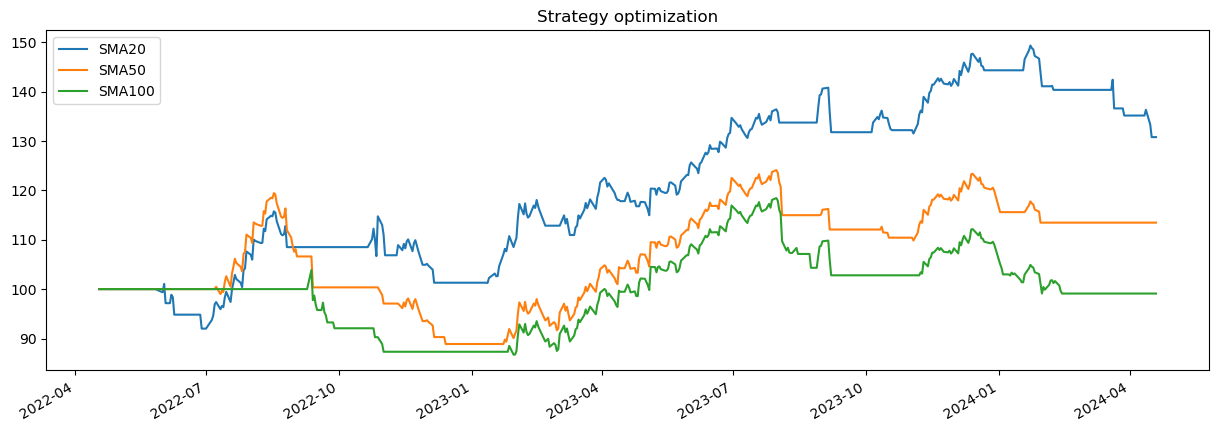

In [19]:
bt_results.plot(title='Strategy optimization')

In [20]:
def buy_and_hold(ticker, name,start='2022-04-19', end='2024-04-19'):
    price_data= price_data=bt.get(ticker, start=start, end=end)

    bt_strategy=bt.Strategy(name, 
                            [bt.algos.RunOnce(),
                             bt.algos.SelectAll(), 
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, price_data)
        

In [21]:
benchmark=buy_and_hold(ticker,name='benchmark')

In [22]:
bt_results=bt.run(sma20,sma50,sma100,benchmark)

<Axes: title={'center': 'Stragegy benchmarking'}>

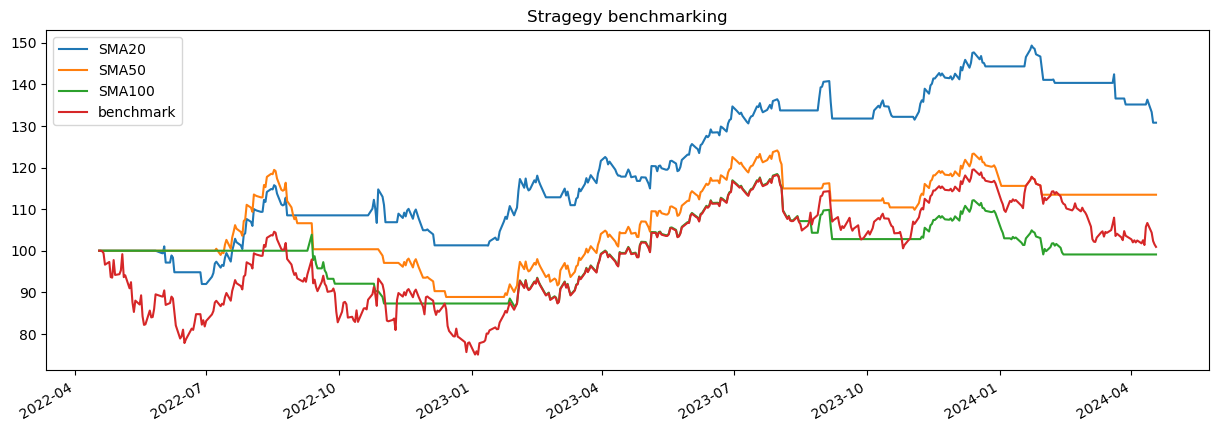

In [23]:
bt_results.plot(title='Stragegy benchmarking')

In [25]:
lookback_returns=bt_results.display_lookback_returns()

In [26]:
print(lookback_returns)

        SMA20   SMA50  SMA100 benchmark
mtd    -3.23%   0.00%   0.00%    -2.59%
3m     -9.38%  -1.84%  -2.25%   -11.33%
6m     -1.28%   2.76%  -3.59%    -4.76%
ytd    -9.38%  -5.35%  -9.08%   -13.13%
1y     10.17%   8.04%  -1.11%     0.88%
3y     14.35%   6.51%  -0.45%     0.46%
5y       nan%    nan%    nan%      nan%
10y      nan%    nan%    nan%      nan%
incep  14.35%   6.51%  -0.45%     0.46%


TypeError: cannot convert the series to <class 'float'>

SMA20        0.148705
SMA50        0.075269
SMA100       0.005749
benchmark    0.043691
Name: daily_mean, dtype: object


TypeError: must be real number, not DataFrame